In [ ]:
from pathlib import Path
from matplotlib import pyplot as plt
import salem

In [ ]:
import socket
hostname = socket.gethostname()

if hostname.lower().startswith('chinook'):
    fiboreal = "/import/AKCASC/"
else:
    print("This notebook is supposed to be run on chinook")

wrfdir =  Path("/import/beegfs/CMIP6/wrf_era5/") 

In [ ]:
datadir = wrfdir
datadir, "exists" if datadir.exists() else "doesn't exist"

(PosixPath('/import/beegfs/CMIP6/wrf_era5'), 'exists')

In [ ]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Nimbus Sans'] 


Text(0.5, 0.78, 'WRF domains: Outer domain (12 km) and inner domain (4 km)')

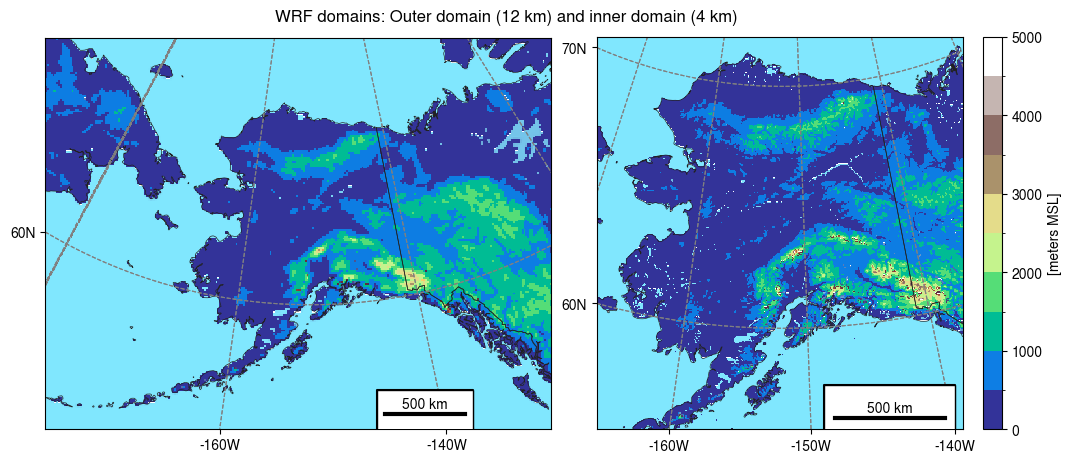

In [ ]:
ds1 = salem.open_wrf_dataset(datadir / 'geo_em.d01.nc')
ds2 = salem.open_wrf_dataset(datadir / 'geo_em.d02.nc')

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8), width_ratios=[3, 2.4], layout='constrained')
smap = salem.Map(ds1.salem.grid, countries=False)
smap.set_data(ds1.HGT_M.where(ds1.LANDMASK))  
smap.set_cmap('terrain')
smap.set_vmax(5000)
smap.set_plot_params(levels=list(range(0, 5500, 500)))
smap.set_shapefile(countries=True, color='#222222', linewidths=0.5)
smap.visualize(ax=ax1, addcbar=False)
smap_cold = salem.Map(ds1.salem.grid, countries=False)
smap_cold.set_data(ds1.HGT_M.where(1-ds1.LANDMASK)+1000)
smap_cold.set_cmap('managua_r')
smap_cold.set_scale_bar(location=(0.75, 0.038), add_bbox=True)
smap_cold.plot(ax=ax1)

smap = salem.Map(ds2.salem.grid, countries=False)
smap.set_data(ds2.HGT_M.where(ds2.LANDMASK))  
smap.set_cmap('terrain')
smap.set_vmax(5000)
smap.set_plot_params(levels=list(range(0, 5500, 500)))
smap.set_shapefile(countries=True, color='#222222', linewidths=0.5)
smap.visualize(ax=ax2, cbar_title=f"[{ds1.HGT_M.units}]")
smap_cold = salem.Map(ds2.salem.grid, countries=False)
smap_cold.set_data(ds2.HGT_M.where(1-ds2.LANDMASK)+1000)
smap_cold.set_cmap('managua_r')
smap_cold.set_scale_bar(location=(0.8, 0.03), length=500000, add_bbox=True)
smap_cold.plot(ax=ax2)

f.suptitle("WRF domains: Outer domain (12 km) and inner domain (4 km)", y=.78)

In [ ]:
outdir = Path().absolute().parent / "evaluation/working"
outfn = "Fig01.png"

f.savefig(outdir / outfn, bbox_inches="tight", dpi=300)